In [34]:
from matplotlib import pyplot as pl
import pandas as pd

In [139]:
d = pd.read_csv('./log', delimiter='\t', names='time stack data anon rss hwm'.split())

Text(0, 0.5, 'RSS (kilobytes)')

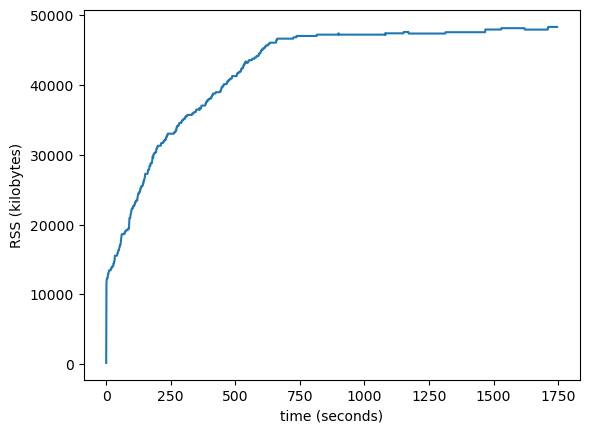

In [140]:
d['rss'].plot()
pl.xlabel('time (seconds)')
pl.ylabel('RSS (kilobytes)')

In [69]:
from typing import Iterator
from pathlib import Path

In [110]:
def parse_smaps(s: str) -> Iterator[dict]:
    cur = {}
    for l in s.split('\n'):
        parts = l.split()
        if len(parts) == 0:
            continue
        if parts[0].endswith(':'):
            cur[parts[0][:-1]] = ' '.join(parts[1:])
        else:
            if cur != {}:
                yield cur

            start_s, end_s = parts[0].split('-')
            perms = parts[1]
            cur = {
                'start': int(start_s, 16),
                'end': int(end_s, 16),
                'perms': parts[1],
                'offset': int(parts[2], 16),
                'dev': parts[3],
                'inode': int(parts[4], 16),
                'pathname': parts[5] if len(parts) >= 6 else '',
            }

In [118]:
SMAPS = Path('smaps')
def read_maps(f: Path) -> dict:
    return { x['start']: x for x in parse_smaps(f.read_text())}
    
fs = sorted([ (float(s.name), read_maps(s)) for s in SMAPS.iterdir() ])
fs = list(fs)

In [119]:
pd.DataFrame(pd.Serifs)

AttributeError: module 'pandas' has no attribute 'Serifs'

In [120]:
pd.Series(fs[1][1])

4194304            {'start': 4194304, 'end': 4214784, 'perms': 'r...
4214784            {'start': 4214784, 'end': 11505664, 'perms': '...
11505664           {'start': 11505664, 'end': 13135872, 'perms': ...
13135872           {'start': 13135872, 'end': 14045184, 'perms': ...
14045184           {'start': 14045184, 'end': 14057472, 'perms': ...
140414505263104    {'start': 140414505263104, 'end': 140414505275...
140414505275392    {'start': 140414505275392, 'end': 140414505349...
140414505349120    {'start': 140414505349120, 'end': 140414505377...
140414505377792    {'start': 140414505377792, 'end': 140414505385...
140414505385984    {'start': 140414505385984, 'end': 140414505443...
140414505443328    {'start': 140414505443328, 'end': 140414505914...
140414505914368    {'start': 140414505914368, 'end': 140414506295...
140414506295296    {'start': 140414506295296, 'end': 140414506303...
140414506303488    {'start': 140414506303488, 'end': 140414506311...
140414506311680    {'start': 14041

In [137]:
x = pd.DataFrame(
{ t0: pd.Series({
    hex(k): rss
    for k,v in stats.items()
    for rss in [int(v['Rss'].split()[0])]
    if v['perms'] != '---p'
    if rss > 1000
  })
  for t0, stats in fs
}).T
x

/tmp/ipykernel_1687523/3034628860.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  { t0: pd.Series({
/tmp/ipykernel_1687523/3034628860.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  { t0: pd.Series({


0x405000  0x4200000000  0x7ffa403f5000  0x7ffa4f828000
0.000187          NaN           NaN             NaN             NaN
0.000205          NaN           NaN             NaN             NaN
20.023851      4240.0        4844.0             NaN          1176.0
40.046713      4240.0        5360.0             NaN          1176.0
60.068704      4240.0        5876.0          1072.0          1176.0
...               ...           ...             ...             ...
2202.506423    4240.0       14432.0         20532.0          1176.0
2222.525104    4240.0       14432.0         20532.0          1176.0
2242.544517    4240.0       14432.0         20532.0          1176.0
2262.564510    4240.0       14432.0         20532.0          1176.0
2282.583488    4240.0       14432.0         20532.0          1176.0

[116 rows x 4 columns]

In [138]:
x.plot()
pl.xlabel('time (seconds)')
pl.ylabel('RSS (kilobytes)')

Text(0, 0.5, 'RSS (kilobytes)')